<a href="https://colab.research.google.com/github/nshea3/blog/blob/master/_notebooks/2020-12-02-Mathematics-of-Drilling-Intercepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# The Mathematics of Drilling Intercepts

Drilling intercepts are a prominent feature of junior mining news releases. They are closely monitored by the mining investment community, and a particularly good intercept can raise the prospects for a project. 

As an example, consider this November 10 2020 release from Freegold Ventures:

> *Freegold Intercepts 3.78 g/t Au Over 119 Metres Including 131.5 g/t Over 3 Metres Within 573 Metres of 1.21 g/t Au at Golden Summit*

The market responded with a 3% boost in the share price the next trading day, so clearly this was regarded as a positive signal for the company's prospects. [(This is typical: capital markets tend to treat any news of this sort as good news.)](https://doi.org/10.1177%2F0312896212473401)

The implications for the economic, geological, and engineering variables surrounding the project are much less clear. *Is this a good geological result? Is it a good engineering result?* Intercepts are *highlights*: incomplete data, collected and released selectively, so is it even possible to make an informed judgement using these numbers?

To complicate things even further, the selectively reported drilling intercepts are usually reported in a rather complex manner, which can make it difficult to distinguish between truly good numbers and deceptively good results.  Drilling intercepts are discussed at great length in other sources (here and here and here) but we'll take a mathematical perspective and develop a model that describes nested intercept configurations of arbitrary complexity.
 
We'll take Great Bear Resources for an extended example. Great Bear Resources is a Canadian junior mining company whose stock gained substantially on announcement of very high grade intercepts at their Dixie project in Ontario. At time of writing, GBR is trading at a $886 million CAD market cap (which is not very bearish at all!) 

<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/symbols/TSXV-GBR/" rel="noopener" target="_blank"><span class="blue-text">GBR Price Today</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-single-quote.js" async>
  {
  "symbol": "TSXV:GBR",
  "width": "100%",
  "colorTheme": "light",
  "isTransparent": false,
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

intercepts = pd.read_excel('drive/My Drive/Projects/posts/data/Great_Bear/lp_drill_hole_composites_all.xlsx')


What are intercepts? 
This will be clearer when considering a single hole:

In [ ]:
dh_101 = intercepts[intercepts['Drill Hole'] == 'BR-101']
dh_101

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t)
398,BR-101,NaN,108.30,108.80,0.50,7.47
399,BR-101,and,120.30,133.00,12.70,0.51
400,BR-101,including,127.85,128.85,1.00,2.42
401,BR-101,and,143.00,160.00,17.00,0.17
402,BR-101,and,169.85,233.10,63.25,3.61
403,BR-101,including,169.85,222.00,52.15,4.24
404,BR-101,and including,195.00,198.00,3.00,42.70
405,BR-101,and including,195.50,197.50,2.00,61.73
406,BR-101,and including,197.00,197.50,0.50,118.00
407,BR-101,and including,211.90,222.00,10.10,5.91


Many experienced mining investors immediately recognize these grades as very high, but the rest of us might need to rely on statistics, since we don't have the benefit of many years' experience with drilling results. 

Of course it is first necessary to determine the true assay values for each separate interval from top to bottom. As described above, the subinterval gold is INCLUDED in the parent interval calculatoin. So we can't just use the `Gold (g/t)` field directly, since intercepts are reported with "highlights", or higher grade sections within the longer interval. 

Sometimes this convention is used unethically to suggest larger intervals of enrichment than truly exist. This is called "grade smearing" and the method of residual grade calculation applied here will detect any such attempt to disguise poor results. 

In [ ]:
dh_101['Record'] = dh_101.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dh_101

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t),Record
398,BR-101,NaN,108.30,108.80,0.50,7.47,398
399,BR-101,and,120.30,133.00,12.70,0.51,399
400,BR-101,including,127.85,128.85,1.00,2.42,400
401,BR-101,and,143.00,160.00,17.00,0.17,401
402,BR-101,and,169.85,233.10,63.25,3.61,402
403,BR-101,including,169.85,222.00,52.15,4.24,403
404,BR-101,and including,195.00,198.00,3.00,42.70,404
405,BR-101,and including,195.50,197.50,2.00,61.73,405
406,BR-101,and including,197.00,197.50,0.50,118.00,406
407,BR-101,and including,211.90,222.00,10.10,5.91,407


At first it may seem like the correct interpretation of these intervals is to imagine them intervals stacked on top of one another, but this is very misleading. We can easily visualize this to see the error:


In [ ]:
import altair as alt

y_axis = alt.Axis(
    title='Intercept ID',
    offset=5,
    ticks=False,
    domain=False
)

alt.Chart(dh_101).mark_bar().encode(
    alt.X('From (m):Q',
        scale=alt.Scale(zero=False)),
    x2='To (m):Q',
    y=alt.Y('Drill Hole:N', axis=y_axis),
    color=alt.Color('Gold (g/t):Q', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('Width (m):Q', title='Width'),
        alt.Tooltip('Gold (g/t):Q', title='Gold Grade')
    ]
).properties(width=800, height=100).configure(background='#D9E9F0')

alt.Chart(...)

- Example:





- This is actually a fairly complicated question. 
- Parent intervals can have no child intervals, a single child interval, or several child intervals. 
- Child intervals themselves can have no child intervals, a single child interval, or several child intervals 
- We only have the total grade, INCLUDING the high-grade, child subintervals. Considering it in that way ignores the fact that the high-grade intervals are included in the wider, lower-grade intervals, inflating the grade measured over that length. This has enormous implications for the *continuity* of the mineralization, which determines the feasibility of the project. 

In order to eliminate this effect we'll need to do some math with the intercepts. This visualization attempts to show this hierarchical, branching structure:

In [ ]:
import altair as alt

y_axis = alt.Axis(
    title='Interval ID',
    offset=5,
    ticks=False,
    domain=False
)

alt.Chart(dh_101).mark_bar().encode(
    alt.X('From (m):Q',
        scale=alt.Scale(zero=False)),
    x2='To (m):Q',
    y=alt.Y('Record:N', axis=y_axis),
    color=alt.Color('Gold (g/t):Q', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('Width (m):Q', title='Width'),
        alt.Tooltip('Gold (g/t):Q', title='Gold Grade')
    ]
).properties(width=800, height=400).configure(background='#D9E9F0')

alt.Chart(...)



Plotted side by side, the intercepts show the parent-child overlapping relationship and capture the complexity of the problem. 

- The parent-child relationship can be expressed in a matrix form.

- Imagine 

In [ ]:
!pip install anytree

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
from anytree import Node, RenderTree

#nodes = [Node()]

We can use a cool feature of Pandas and convert the From and To fields to intervals

In [ ]:
#dh_101['Interval'] = pd.Interval(dh_101['From (m)'].values, dh_101['To (m)'].values)

In [ ]:
dh_101['From (m)'].values

array([108.3 , 120.3 , 127.85, 143.  , 169.85, 169.85, 195.  , 195.5 ,
       197.  , 211.9 , 211.9 , 211.9 , 212.45, 216.  ])

In [ ]:
dh_101['Interval'] = dh_101.apply(lambda x: pd.Interval(x['From (m)'], x['To (m)']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dh_101

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t),Record,Interval
398,BR-101,NaN,108.30,108.80,0.50,7.47,398,"(108.3, 108.8]"
399,BR-101,and,120.30,133.00,12.70,0.51,399,"(120.3, 133.0]"
400,BR-101,including,127.85,128.85,1.00,2.42,400,"(127.85, 128.85]"
401,BR-101,and,143.00,160.00,17.00,0.17,401,"(143.0, 160.0]"
402,BR-101,and,169.85,233.10,63.25,3.61,402,"(169.85, 233.1]"
403,BR-101,including,169.85,222.00,52.15,4.24,403,"(169.85, 222.0]"
404,BR-101,and including,195.00,198.00,3.00,42.70,404,"(195.0, 198.0]"
405,BR-101,and including,195.50,197.50,2.00,61.73,405,"(195.5, 197.5]"
406,BR-101,and including,197.00,197.50,0.50,118.00,406,"(197.0, 197.5]"
407,BR-101,and including,211.90,222.00,10.10,5.91,407,"(211.9, 222.0]"


Now we can use the pd.Overlaps function


In [ ]:
import itertools

cross_interval = itertools.product(dh_101.Interval,dh_101.Interval)

In [ ]:
import numpy as np

#[interval[0].overlaps(interval[1]) for interval in cross_interval]

overlap_matrix = np.array([interval[0].overlaps(interval[1]) for interval in cross_interval])

In [ ]:
overlap_matrix.shape

(196,)

In [ ]:
overlap_matrix.reshape(14,14)

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
        False, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,
        False, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,
        F

In [ ]:
overlap_matrix

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,

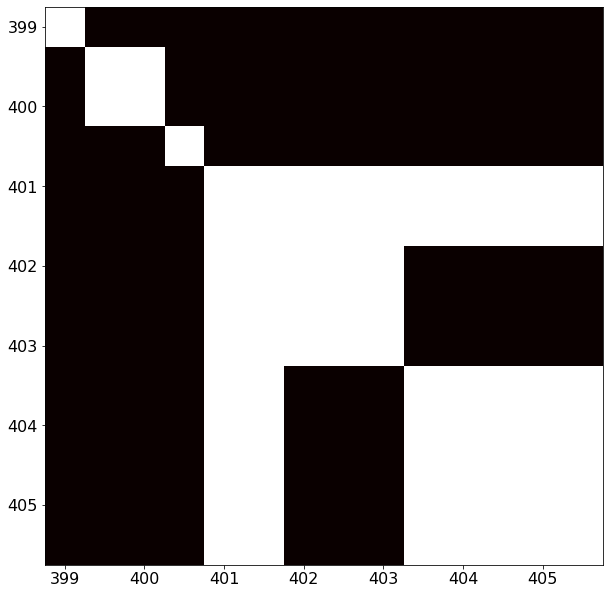

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1,1, figsize=(10,11))

img = ax.imshow(overlap_matrix.reshape(14,14), cmap='hot', interpolation='nearest')

x_label_list = dh_101.Record.values

text = ax.set_xticklabels(x_label_list)
text = ax.set_yticklabels(x_label_list)


So we get overlaps, but we do not get contains, which is unfortunate. 

Overlap is symmetric: so each 'child' overlaps with its parent and 

Can get another python package and redo all of this with a different datatype

In [ ]:
from sympy import Interval

In [ ]:
dh_101['Interval_obj'] = dh_101.apply(lambda x: Interval(x['From (m)'], x['To (m)']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cross_interval = itertools.product(dh_101.Interval_obj,dh_101.Interval_obj)
contain_matrix = np.array([interval[0].is_proper_superset(interval[1]) for interval in cross_interval])
contain_matrix.reshape(14,14)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        F

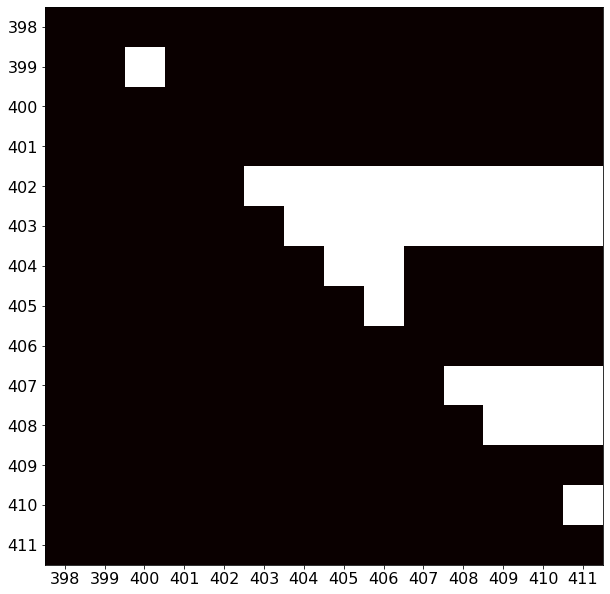

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1,1, figsize=(10,11))

img = ax.imshow(contain_matrix.reshape(14,14), cmap='hot', interpolation='nearest')

x_label_list = dh_101.Record.values

ax.set_xticks(np.arange(0, 14, 1))
ax.set_yticks(np.arange(0, 14, 1))

text = ax.set_xticklabels(x_label_list)
text = ax.set_yticklabels(x_label_list)

Now we can pull out a tree 

In [ ]:
contain_matrix.reshape(14,14).astype(float)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
for column in contain_matrix.reshape(14,14).astype(float).T:
  print(column)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.]


In [ ]:
contain_matrix.reshape(14,14)[:,0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

Of the machine-intelligible formats, a **tree data structure** is clearly the most suited to representing the intervals. 

In [ ]:
from anytree import Node, RenderTree, AsciiStyle, PreOrderIter

interval_pairs = list(itertools.product(dh_101.Record.values, dh_101.Record.values))
parent_child = list(contain_matrix)

root = Node("BR-101")

all_str_to_node = {str(dh_101['Record'].values[i]) : Node(str(dh_101['Record'].values[i]), parent = root) for i, column in enumerate(contain_matrix.reshape(14,14).T)}

#[all_str_to_node[str(dh_101['Record'].values[i])].parent := root for i, column in enumerate(contain_matrix.reshape(14,14).T) if ~np.any(column)]

contain_matrix_sq = contain_matrix.reshape(14,14)

#for i, col in enumerate(contain_matrix_sq.T):
#  print(col)
#  if ~np.any(col):
#    #all_str_to_node[str(dh_101['Record'].values[i])].parent = root
#    print("Root: {}".format(dh_101['Record'].values[i]))
#  else:
#    print("Parent: {}".format(dh_101['Record'].values[::-1][np.argmax(col[::-1])]))
#    print("Child: {}".format(dh_101['Record'].values[i]))



[False False False False False False False False False False False False
 False False]
Root: 398
[False False False False False False False False False False False False
 False False]
Root: 399
[False  True False False False False False False False False False False
 False False]
Parent: 399
Child: 400
[False False False False False False False False False False False False
 False False]
Root: 401
[False False False False False False False False False False False False
 False False]
Root: 402
[False False False False  True False False False False False False False
 False False]
Parent: 402
Child: 403
[False False False False  True  True False False False False False False
 False False]
Parent: 403
Child: 404
[False False False False  True  True  True False False False False False
 False False]
Parent: 404
Child: 405
[False False False False  True  True  True  True False False False False
 False False]
Parent: 405
Child: 406
[False False False False  True  True False False False False F

In [ ]:
for i, col in enumerate(contain_matrix_sq.T):

  if ~np.any(col):

    all_str_to_node[str(dh_101['Record'].values[i])].parent = root

  else:

    all_str_to_node[str(dh_101['Record'].values[i])].parent = all_str_to_node[str(dh_101['Record'].values[::-1][np.argmax(col[::-1])])]

In [ ]:
print(RenderTree(root, style=AsciiStyle()).by_attr())

BR-101
|-- 398
|-- 399
|   +-- 400
|-- 401
+-- 402
    +-- 403
        |-- 404
        |   +-- 405
        |       +-- 406
        +-- 407
            +-- 408
                |-- 409
                +-- 410
                    +-- 411


Now we are really getting somewhere- we can actually start looking at the global picture (since we now know which intervals are not "child" intervals)

In [ ]:
dh_101_prime = dh_101[dh_101.Record.isin((child.name for child in root.children))]

These are the direct children. We can go ahead and plot them and have a totally accurate picture of the log: 

In [ ]:
y_axis = alt.Axis(
    title='Intercept ID',
    offset=5,
    ticks=False,
    domain=False
)


reqd_cols = ['From (m)', 'To (m)', 'Gold (g/t)', 'Width (m)']


alt.Chart(dh_101_prime[reqd_cols]).mark_bar().encode(
    alt.X('From (m):Q',
        scale=alt.Scale(zero=False)),
    x2='To (m):Q',
    y=alt.Y('Drill Hole:N', axis=y_axis),
    color=alt.Color('Gold (g/t):Q', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('Width (m):Q', title='Width'),
        alt.Tooltip('Gold (g/t):Q', title='Gold Grade')
    ]
).properties(width=800, height=100).configure(background='#D9E9F0')

alt.Chart(...)

While that is correct, it is not complete: we have left out all of the additional information provided by the smaller sub-intervals! 

In order to incorporate that we will have to remove them from the parent intervals and determine the residual grade (whatever is left once we pull out the gold contained in the subinterval) 

In [ ]:
from anytree import Node, RenderTree, AsciiStyle, LevelOrderIter

#[node.name for node in PostOrderIter(all_str_to_node['402'])]

#[(node.name, node.parent) for node in LevelOrderIter(root)]

In [ ]:
((119) * (3.78) - (3) * (131.5)) / (119 - 3)

As an example of this kind of calculation, a simpler set of intervals from a  Freegold Ventures press release: 

> *Freegold Intercepts 3.78 g/t Au Over 119 Metres Including 131.5 g/t Over 3 Metres Within 573 Metres of 1.21 g/t Au at Golden Summit*

We know the gold grade over the whole 119 meters, and the gold grade over 3 meters, but what is the gold grade over the $119 - 3 = 116 m$?

The solution is a simple weighted average calculation, like compositing over a drillhole: 

$\frac{119 \times 3.78-3 \times 131.5}{119-3} = 0.477 g/t$


Credit to https://twitter.com/BrentCo77759016/status/1326183861722599424 and 


So now we have to do this, but with every single subinterval until we get the residual grade at every point along the drillhole

Fortunately, the tree data structure we selected has specialized methods that make a traversal very simple. 


In [ ]:
levelord_nodes = [(node.name, node.children) for node in LevelOrderIter(root)]

levelord_nodes

[('BR-101',
  (Node('/BR-101/398'),
   Node('/BR-101/399'),
   Node('/BR-101/401'),
   Node('/BR-101/402'))),
 ('398', ()),
 ('399', (Node('/BR-101/399/400'),)),
 ('401', ()),
 ('402', (Node('/BR-101/402/403'),)),
 ('400', ()),
 ('403', (Node('/BR-101/402/403/404'), Node('/BR-101/402/403/407'))),
 ('404', (Node('/BR-101/402/403/404/405'),)),
 ('407', (Node('/BR-101/402/403/407/408'),)),
 ('405', (Node('/BR-101/402/403/404/405/406'),)),
 ('408',
  (Node('/BR-101/402/403/407/408/409'), Node('/BR-101/402/403/407/408/410'))),
 ('406', ()),
 ('409', ()),
 ('410', (Node('/BR-101/402/403/407/408/410/411'),)),
 ('411', ())]

In [ ]:
nn_np_loi = [(node.name, node.parent) for node in LevelOrderIter(root)]

In [ ]:
all_str_to_node

{'398': Node('/BR-101/398'),
 '399': Node('/BR-101/399'),
 '400': Node('/BR-101/399/400'),
 '401': Node('/BR-101/401'),
 '402': Node('/BR-101/402'),
 '403': Node('/BR-101/402/403'),
 '404': Node('/BR-101/402/403/404'),
 '405': Node('/BR-101/402/403/404/405'),
 '406': Node('/BR-101/402/403/404/405/406'),
 '407': Node('/BR-101/402/403/407'),
 '408': Node('/BR-101/402/403/407/408'),
 '409': Node('/BR-101/402/403/407/408/409'),
 '410': Node('/BR-101/402/403/407/408/410'),
 '411': Node('/BR-101/402/403/407/408/410/411')}

In [ ]:
for node, parent in nn_np_loi[::-1][:-1]:
  print(node)
  for child in all_str_to_node[node].children:
    print(child)

411
410
Node('/BR-101/402/403/407/408/410/411')
409
406
408
Node('/BR-101/402/403/407/408/409')
Node('/BR-101/402/403/407/408/410')
405
Node('/BR-101/402/403/404/405/406')
407
Node('/BR-101/402/403/407/408')
404
Node('/BR-101/402/403/404/405')
403
Node('/BR-101/402/403/404')
Node('/BR-101/402/403/407')
400
402
Node('/BR-101/402/403')
401
399
Node('/BR-101/399/400')
398


In [ ]:
dh_101

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t),Record,Interval,Interval_obj
398,BR-101,NaN,108.30,108.80,0.50,7.47,398,"(108.3, 108.8]","Interval(108.300000000000, 108.800000000000)"
399,BR-101,and,120.30,133.00,12.70,0.51,399,"(120.3, 133.0]","Interval(120.300000000000, 133.000000000000)"
400,BR-101,including,127.85,128.85,1.00,2.42,400,"(127.85, 128.85]","Interval(127.850000000000, 128.850000000000)"
401,BR-101,and,143.00,160.00,17.00,0.17,401,"(143.0, 160.0]","Interval(143.000000000000, 160.000000000000)"
402,BR-101,and,169.85,233.10,63.25,3.61,402,"(169.85, 233.1]","Interval(169.850000000000, 233.100000000000)"
403,BR-101,including,169.85,222.00,52.15,4.24,403,"(169.85, 222.0]","Interval(169.850000000000, 222.000000000000)"
404,BR-101,and including,195.00,198.00,3.00,42.70,404,"(195.0, 198.0]","Interval(195.000000000000, 198.000000000000)"
405,BR-101,and including,195.50,197.50,2.00,61.73,405,"(195.5, 197.5]","Interval(195.500000000000, 197.500000000000)"
406,BR-101,and including,197.00,197.50,0.50,118.00,406,"(197.0, 197.5]","Interval(197.000000000000, 197.500000000000)"
407,BR-101,and including,211.90,222.00,10.10,5.91,407,"(211.9, 222.0]","Interval(211.900000000000, 222.000000000000)"


In [ ]:
dh_101['grade_len'] = dh_101['Gold (g/t)'] * dh_101['Width (m)']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dh_101

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t),Record,Interval,Interval_obj,grade_len
398,BR-101,NaN,108.30,108.80,0.50,7.47,398,"(108.3, 108.8]","Interval(108.300000000000, 108.800000000000)",3.7350
399,BR-101,and,120.30,133.00,12.70,0.51,399,"(120.3, 133.0]","Interval(120.300000000000, 133.000000000000)",6.4770
400,BR-101,including,127.85,128.85,1.00,2.42,400,"(127.85, 128.85]","Interval(127.850000000000, 128.850000000000)",2.4200
401,BR-101,and,143.00,160.00,17.00,0.17,401,"(143.0, 160.0]","Interval(143.000000000000, 160.000000000000)",2.8900
402,BR-101,and,169.85,233.10,63.25,3.61,402,"(169.85, 233.1]","Interval(169.850000000000, 233.100000000000)",228.3325
403,BR-101,including,169.85,222.00,52.15,4.24,403,"(169.85, 222.0]","Interval(169.850000000000, 222.000000000000)",221.1160
404,BR-101,and including,195.00,198.00,3.00,42.70,404,"(195.0, 198.0]","Interval(195.000000000000, 198.000000000000)",128.1000
405,BR-101,and including,195.50,197.50,2.00,61.73,405,"(195.5, 197.5]","Interval(195.500000000000, 197.500000000000)",123.4600
406,BR-101,and including,197.00,197.50,0.50,118.00,406,"(197.0, 197.5]","Interval(197.000000000000, 197.500000000000)",59.0000
407,BR-101,and including,211.90,222.00,10.10,5.91,407,"(211.9, 222.0]","Interval(211.900000000000, 222.000000000000)",59.6910


In [ ]:
from sympy import Union
import functools

for node in levelord_nodes[1:]:
  parent_interval = dh_101[dh_101['Record'] == float(node[0])]
  child_names = [child.name for child in node[1]]
  child_intervals = [dh_101[dh_101['Record'] == float(child)] for child in child_names]
  #print(child_names)

  l_child_int = [intv['Interval_obj'].values[0]._measure for intv in child_intervals]
  print(l_child_int)
  #g_child_int = [dh_101.loc[int(child_name)]['Gold (g/t)'] for child_name in child_names]
  lg_child_int = [dh_101.loc[int(child_name)]['grade_len'] for child_name in child_names]

  #print(parent_interval.grade_len)
  #print(sum(lg_child_int))
  #print(parent_interval['Width (m)'].values[0])
  #print(child_intervals)


  #resid_grade = (parent_interval.grade_len - sum(lg_child_int)) / (parent_interval['Width (m)'] - sum(l_child_int))
  #print(resid_grade)


  
  #try:
  #  print(parent_interval)
  #  print(parent_interval._boundary)
  #  print(parent_interval._measure)
  #except TypeError:
  #  print("typeerror")

[]
[1.00000000000000]
[]
[52.1500000000000]
[]
[3.00000000000000, 10.1000000000000]
[2.00000000000000]
[9.09999999999999]
[0.500000000000000]
[5.09999999999999, 5.55000000000001]
[]
[]
[2.00000000000000]
[]


In [ ]:
Interval(120.300000000000, 133.000000000000) - Interval(127.850000000000, 128.850000000000)

Union(Interval.Ropen(120.300000000000, 127.850000000000), Interval.Lopen(128.850000000000, 133.000000000000))

In [ ]:
{Interval(120.300000000000, 133.000000000000) : 1, Interval(127.850000000000, 128.850000000000):2}

{Interval(120.300000000000, 133.000000000000): 1,
 Interval(127.850000000000, 128.850000000000): 2}

In [ ]:
dh_101[dh_101.Record == 398]

,Drill Hole,Unnamed: 1,From (m),To (m),Width (m),Gold (g/t),Record,Interval,Interval_obj
398,BR-101,NaN,108.3,108.8,0.5,7.47,398,"(108.3, 108.8]","Interval(108.300000000000, 108.800000000000)"
